# Exploratory data analysis- Heart disease

## The Data

This dataset contains information about contains diagnoses of heart disease patients.Heart disease prevention is a major health concern, not only in the USA Worth but also across the world. It’s vital that people learn to identify and manage heart disease risk factors, such as heart-healthy eating, regular exercise, and seeing a doctor to measure blood pressure, cholesterol, and weight. 

According to World Health Organisation (WHO), heart diseases, also a part of cardiovascular diseases, are the number 1 cause of death globally- killing 17.9 millions of lives every year. People who are suffering from heart diseases are known to demonstrate high blood pressure, lipids, glucose as well as obesity and overweight issues. The ability to identify these high risk factors will ensure that the patients receieve appropriate medical care and prevent premature deaths.

__Data Source:__ 
 - This Data set was collected from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

__Creators:__

 - Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
 - University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
 - University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
 - V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
 
__Attribute Information:__
1. Age
2. Sex: (1 = Male, 0 = Female)
3. cp(chest pain type):
  - 1 = typical angina
  - 2 = atypical angina
  - 3 = non-anginal pain
  - 4 = asymptomatic
4. trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
5. chol: Serum cholestoral in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl 
    - 1 = true
    - 0 = false
7. restecg: Resting electrocardiographic results
   - 0: Normal
   - 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina 
    - 1 = yes 
    - 0 = no
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
    - 1: Upsloping
    - 2: Flat
    - 3: Downsloping
12. ca: Number of major vessels (0-3) colored by flourosopy
13. thal: Thalium heart scan
    - 1: Normal
    - 2: Fixed defect
    - 3: Reversable defect
14. target: Diagnosis of heart disease
    - 1: Yes
    - 0: No

### Reading Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/boosting/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Dealing with Null value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Cheking again is there any null value
assert df.dtypes.any() != object
df.isnull().values.any() 

False

In [9]:
#Checking for unique values in columns
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

 __Initial observation__

There are 303 records and 14 columns are present. Mixture of Integer and flaot datatypes datas are present. basically Dataset consisits numerical columns
And There are no missing values present in any of the columns
When we looked at unique values in each columns, barring trestbps, chol, thalach, oldpeak all remaining columns needs to be converted to categorical type
We need to predit presence (value 1) or absence (value 0) of heart disease in the patient which are given in target column.
Since we know the target class, this is supervised learning, typical binary Classification modelling.

Now that we know there is no null value. We will change All the columns have catagorical value from given digit indicator to name. so we can understand it without any confusion.

In [10]:
#convert columns to category
columns_to_category= ['ca', 'thal','sex','cp','fbs','restecg','exang','slope','target']
df[columns_to_category]= df[columns_to_category].astype('category')

In [11]:
df['sex'] = df.sex.replace([1,0], ['male', 'female'])
df['cp'] = df.cp.replace([0,1,2,3,4], ['no_cp','typical_ang', 'atypical_ang', 'non_anginal_pain', 'asymptomatic'])
df['fbs'] = df.fbs.replace([1,0], ['true', 'false'])
df['restecg'] = df.restecg.replace([0,1,2], ['normal', 'st_abnormality', 'prob_lvh'])
df['exang'] = df.exang.replace([0,1], ['no', 'yes'])
df['slope'] = df.slope.replace([0,1,2,3], ['no_slope','upsloping', 'flat', 'downsloping'])
df['thal'] = df.thal.replace([1,2,3], ['normal', 'fixed_def', 'rev_def'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non_anginal_pain,145,233,true,normal,150,no,2.3,no_slope,0,normal,1
1,37,male,atypical_ang,130,250,false,st_abnormality,187,no,3.5,no_slope,0,fixed_def,1
2,41,female,typical_ang,130,204,false,normal,172,no,1.4,flat,0,fixed_def,1
3,56,male,typical_ang,120,236,false,st_abnormality,178,no,0.8,flat,0,fixed_def,1
4,57,female,no_cp,120,354,false,st_abnormality,163,yes,0.6,flat,0,fixed_def,1


Now we will change some column names for better understanding.

In [12]:
df.rename(columns={'cp': 'chestPain', 'trestbps': 'restingBP', 'chol': 'cholesterol',
                   'fbs': 'bloodSuger', 'thalach': 'maxHR', 'ca': 'majorVessels',
                   'thal': 'heartScan', 'target': 'diagnosis'}, inplace=True)
df.head()

,age,sex,chestPain,restingBP,cholesterol,bloodSuger,restecg,maxHR,exang,oldpeak,slope,majorVessels,heartScan,diagnosis
0,63,male,non_anginal_pain,145,233,true,normal,150,no,2.3,no_slope,0,normal,1
1,37,male,atypical_ang,130,250,false,st_abnormality,187,no,3.5,no_slope,0,fixed_def,1
2,41,female,typical_ang,130,204,false,normal,172,no,1.4,flat,0,fixed_def,1
3,56,male,typical_ang,120,236,false,st_abnormality,178,no,0.8,flat,0,fixed_def,1
4,57,female,no_cp,120,354,false,st_abnormality,163,yes,0.6,flat,0,fixed_def,1


### Statistical summary
 This section will show descriptive statistics of numerical variables.

In [13]:
df.describe()

,age,restingBP,cholesterol,maxHR,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


 __Observation__
 1. mean and median of age, resting BP, oldpeaks are almost similar. Outliers may have less impact.
 2. In other two columns mean is higher than median which tells outliers might have present. Data Distribution is skewed towards right.

## EDA 

Now we will visualize variables. and trying to do some hypothesis.

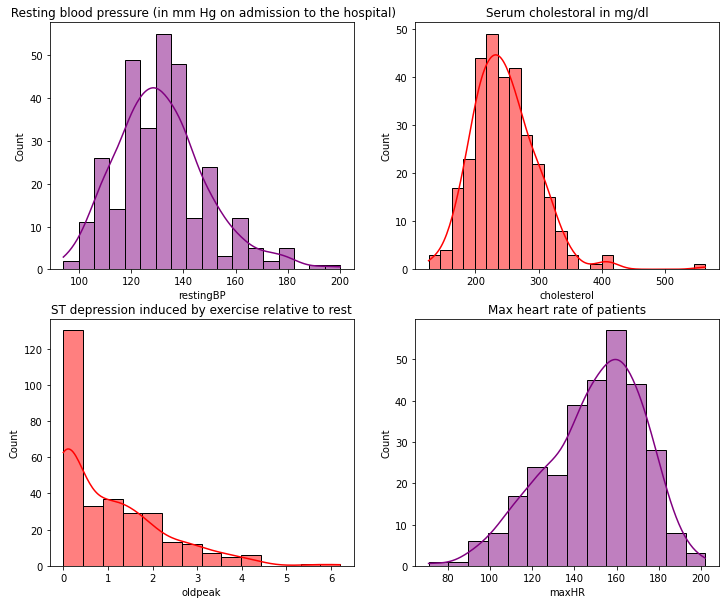

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(df['restingBP'],color = "purple", kde=True)
plt.title(' Resting blood pressure (in mm Hg on admission to the hospital)')

plt.subplot(222)
sns.histplot(df['cholesterol'],color = "Red", kde=True)
plt.title('Serum cholestoral in mg/dl')

plt.subplot(223)
sns.histplot(df['oldpeak'],color = "red", kde=True)
plt.title('ST depression induced by exercise relative to rest')

plt.subplot(224)
sns.histplot(df['maxHR'],color = "purple", kde=True)
plt.title('Max heart rate of patients')
plt.show()

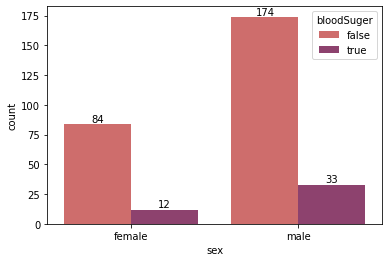

In [15]:
ax = sns.countplot(x='sex', hue='bloodSuger',palette='flare', data=df)
for container in ax.containers:
    ax.bar_label(container)

Here we can see How many male or female are suffering from heart disease.

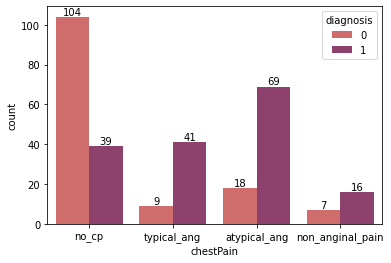

In [161]:
ax = sns.countplot(x='chestPain', hue='diagnosis',palette='flare', data=df)
for container in ax.containers:
    ax.bar_label(container)

From here we can see petient who heart failuers have what kind chest pain.

C:\Users\sumai\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumai\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of patients with heart disease')

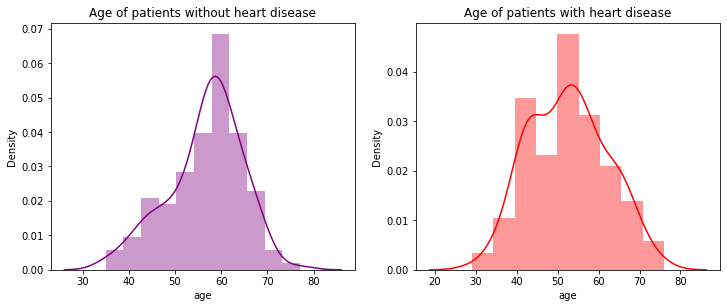

In [144]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].age , color ='purple')
plt.title('Age of patients without heart disease')

plt.subplot(222)
sns.distplot(df[df['diagnosis']==1].age , color ='red')
plt.title('Age of patients with heart disease')

Here we can see from age 45-55 old have more heart disease.

   - We will try to find that chance of having heart failure with chest pain and other symptoms.

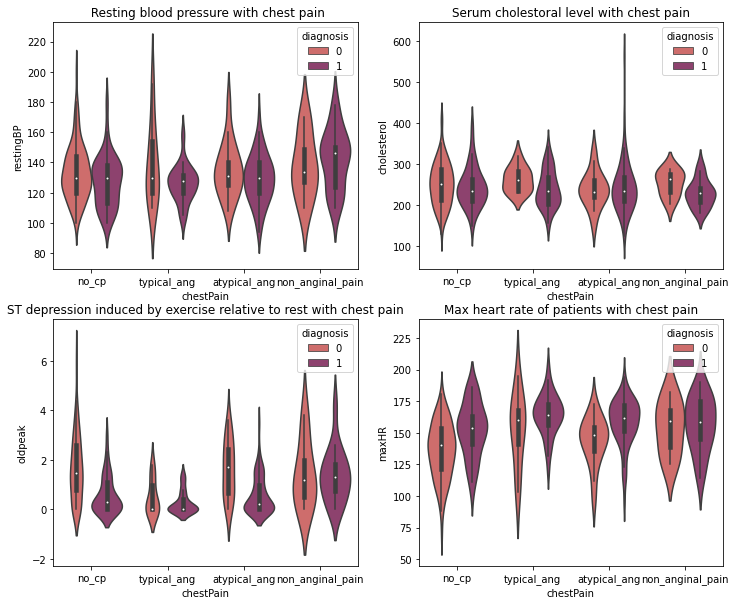

In [145]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.violinplot(data=df, x="chestPain", y="restingBP",palette='flare', hue="diagnosis")
plt.title(' Resting blood pressure with chest pain')

plt.subplot(222)
sns.violinplot(data=df, x="chestPain", y="cholesterol",palette='flare', hue="diagnosis")
plt.title('Serum cholestoral level with chest pain')

plt.subplot(223)
sns.violinplot(data=df, x="chestPain", y="oldpeak",palette='flare', hue="diagnosis")
plt.title('ST depression induced by exercise relative to rest with chest pain')

plt.subplot(224)
sns.violinplot(data=df, x="chestPain", y="maxHR",palette='flare', hue="diagnosis")
plt.title('Max heart rate of patients with chest pain')
plt.show()

   - we will use the PairPlot tool from Seaborn to see the distribution and relationships among variables. Since pairplot won't work well with categorical data, we can only pick numerical data for this case.

In [147]:
numeric_columns=['restingBP','cholesterol','maxHR','age','oldpeak','diagnosis']

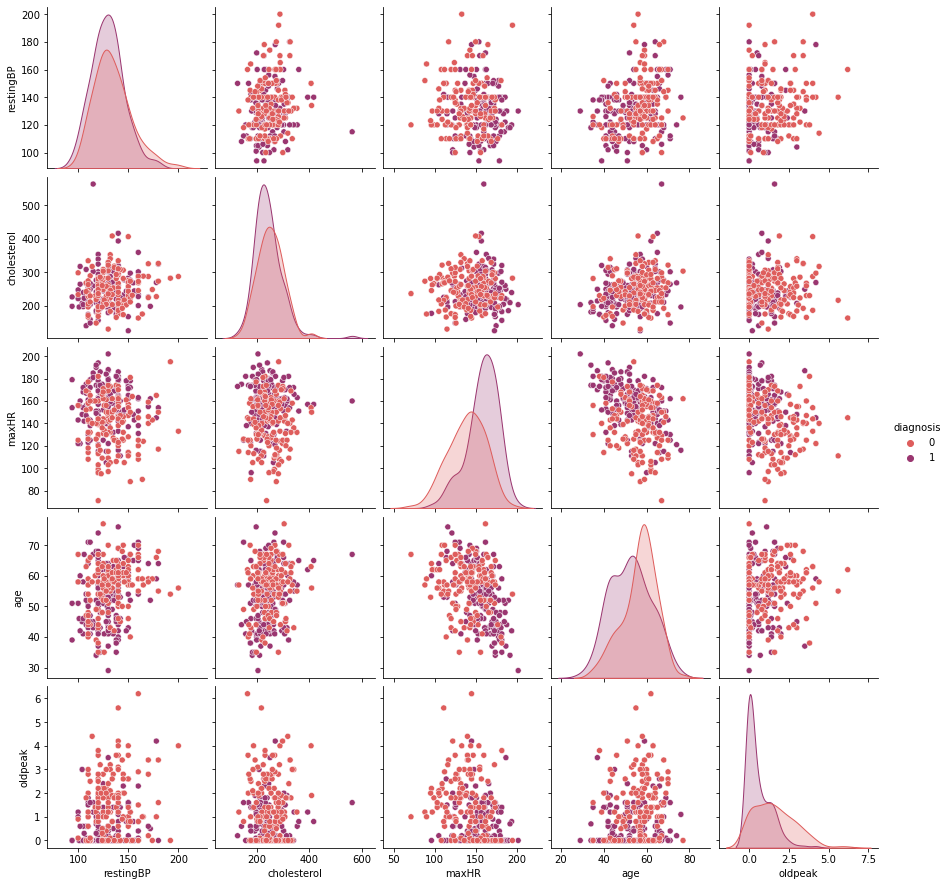

In [148]:
sns.pairplot(df[numeric_columns],palette='flare', hue = 'diagnosis')

__Observations:__
There is no significant pattern found in Target against Blood pressure. Blood Sugar might not be good predictor of target.
Other than resting blood pressure, we do see distinct differences between heart disease patients and healthy patients in the targeted attributes.
For instance, we do see an even distribution of heart disease patients in the age category, while healthly patients are more distributed to the right.

__Correlations:__
Correlation is determined by Person's R and can't be defined when the data is categorical. Hence, we are going to do with only numerical variables.

C:\Users\sumai\AppData\Local\Temp\ipykernel_20544\2243568142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, linewidths=0.1)


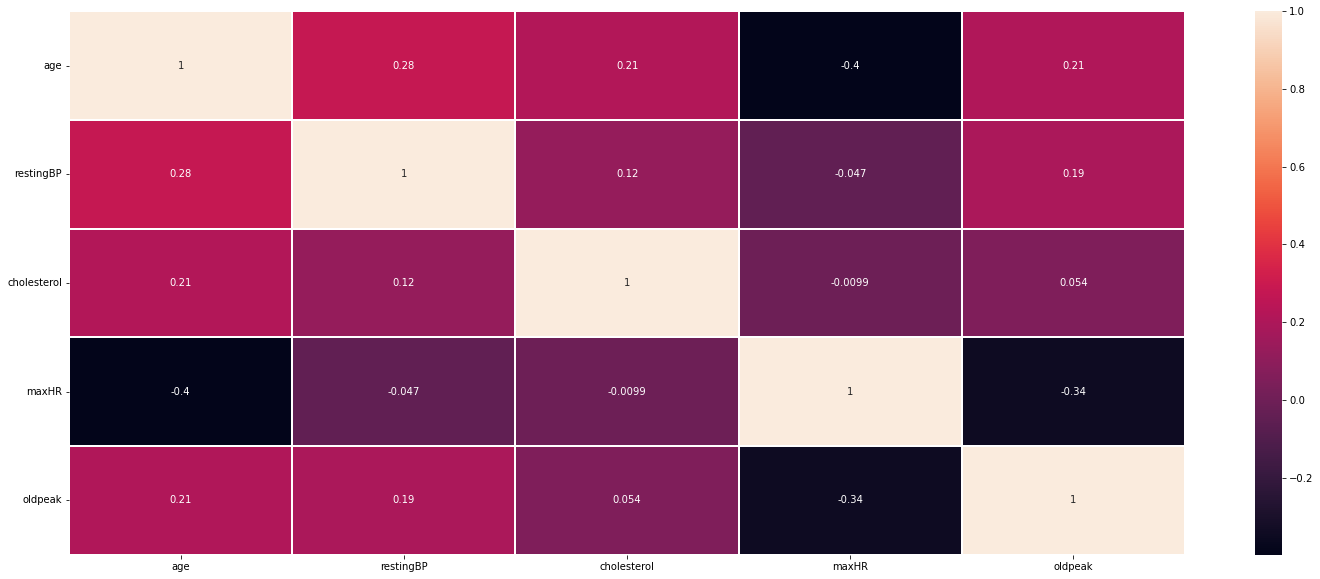

In [151]:
sns.heatmap(df[numeric_columns].corr(),annot=True, linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.show()

From here, we can see that there is a correlation between age,Resting blood pressure achieved. Except for these attributes, the rest seem to show very weak correlation.

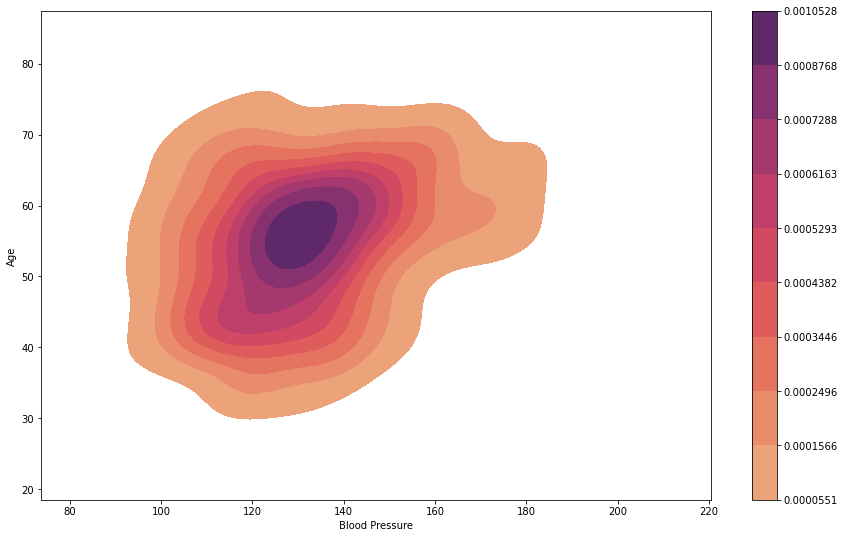

In [158]:
plt.figure(figsize=(15,9))
sns.kdeplot(data=df,x='restingBP',y='age',shade=True,cmap='flare',cbar=True)
plt.xlabel('Blood Pressure')
plt.ylabel('Age');

C:\Users\sumai\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumai\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumai\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

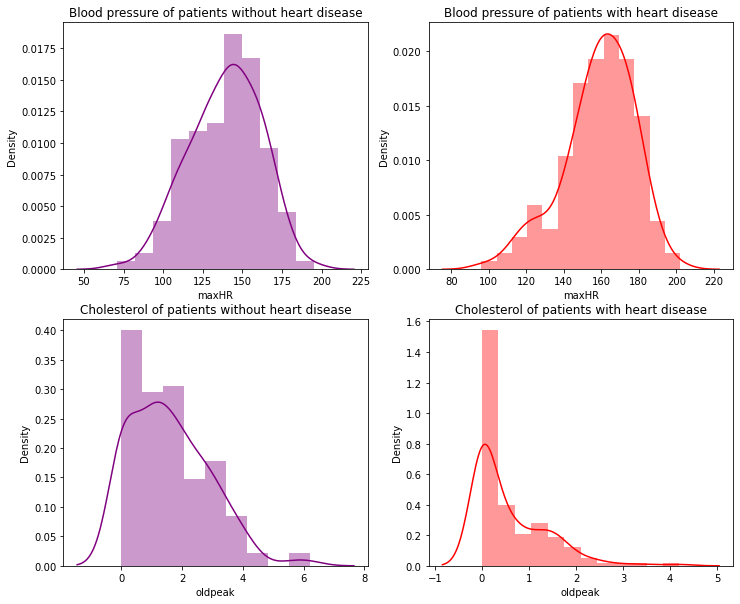

In [165]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].maxHR , color ='purple')
plt.title('Heart rate of patients without heart disease')

plt.subplot(222)
sns.distplot(df[df['diagnosis']==1].maxHR , color ='red')
plt.title('Heart rate of patients with heart disease')

plt.subplot(223)
sns.distplot(df[df['diagnosis']==0].oldpeak, color ='purple' )
plt.title('ST depression induced of patients without heart disease')

plt.subplot(224)
sns.distplot(df[df['diagnosis']==1].oldpeak, color ='red')
plt.title('ST depression induced of patients with heart disease')
plt.show()

From here we can see some significant changes of patients who have heart failure and who have not.

In [1]:
# fig, ax = plt.subplots(figsize=(10,6))

# sns.kdeplot(df[df["diagnosis"]==1]["restingBP"], shade=True, color="red", label="Presence of Heart Disease", ax=ax)
# sns.kdeplot(df[df["diagnosis"]==0]["restingBP"], shade=True, color="purple", label="Absence of Heart Disease", ax=ax)

# fig.suptitle("Presence of Heart Disease by Blood Pressure")

# ax.legend();